In [2]:
import findspark
findspark.init()
findspark.find()

'/Users/pnferreira-m1/anaconda3/envs/koru/lib/python3.11/site-packages/pyspark'

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("Koru").getOrCreate()

24/06/19 12:59:14 WARN Utils: Your hostname, pnferreira-m1.local resolves to a loopback address: 127.0.0.1; using 192.168.0.102 instead (on interface en0)
24/06/19 12:59:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/19 12:59:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark

In [5]:
from pyspark.sql import Row
rdd = spark.sparkContext.parallelize([Row(nome='Poliana', idade=25), Row(nome='Alberto', idade=56)])
rdd.collect()

[Row(nome='Poliana', idade=25), Row(nome='Alberto', idade=56)]

24/06/19 12:59:30 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [9]:
df = spark.createDataFrame(rdd)
df.show(2)

+-------+-----+
|   nome|idade|
+-------+-----+
|Poliana|   25|
|Alberto|   56|
+-------+-----+



In [10]:
dados = [('Polianaa', 25), ('Alberto', 56)]
df = spark.createDataFrame(dados, ['nome', 'idade'])
df.show()

+--------+-----+
|    nome|idade|
+--------+-----+
|Polianaa|   25|
| Alberto|   56|
+--------+-----+



In [11]:
df.printSchema()

root
 |-- nome: string (nullable = true)
 |-- idade: long (nullable = true)



In [12]:
df = spark.read.csv('amazon-forest.csv', header=True, inferSchema=True)
df.show(3)

+----+-----+-------+------+----------+
|year|state|  month|number|      date|
+----+-----+-------+------+----------+
|1998| Acre|Janeiro|   0.0|1998-01-01|
|1999| Acre|Janeiro|   0.0|1999-01-01|
|2000| Acre|Janeiro|   0.0|2000-01-01|
+----+-----+-------+------+----------+
only showing top 3 rows



In [13]:
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- month: string (nullable = true)
 |-- number: double (nullable = true)
 |-- date: date (nullable = true)



## Operações em df

In [14]:
df.select("year").show()

+----+
|year|
+----+
|1998|
|1999|
|2000|
|2001|
|2002|
|2003|
|2004|
|2005|
|2006|
|2007|
|2008|
|2009|
|2010|
|2011|
|2012|
|2013|
|2014|
|2015|
|2016|
|2017|
+----+
only showing top 20 rows



In [15]:
# fitlragens
df.filter(df.year > 2015).show()

+----+-----+---------+------+----------+
|year|state|    month|number|      date|
+----+-----+---------+------+----------+
|2016| Acre|  Janeiro|  12.0|2016-01-01|
|2017| Acre|  Janeiro|   0.0|2017-01-01|
|2016| Acre|Fevereiro|   5.0|2016-01-01|
|2017| Acre|Fevereiro|   1.0|2017-01-01|
|2016| Acre|    Mar�o|   0.0|2016-01-01|
|2017| Acre|    Mar�o|   0.0|2017-01-01|
|2016| Acre|    Abril|   0.0|2016-01-01|
|2017| Acre|    Abril|   1.0|2017-01-01|
|2016| Acre|     Maio|  21.0|2016-01-01|
|2017| Acre|     Maio|  10.0|2017-01-01|
|2016| Acre|    Junho|  87.0|2016-01-01|
|2017| Acre|    Junho|  45.0|2017-01-01|
|2016| Acre|    Julho| 533.0|2016-01-01|
|2017| Acre|    Julho| 457.0|2017-01-01|
|2016| Acre|   Agosto| 2.188|2016-01-01|
|2017| Acre|   Agosto| 1.493|2017-01-01|
|2016| Acre| Setembro| 3.586|2016-01-01|
|2017| Acre| Setembro| 3.429|2017-01-01|
|2016| Acre|  Outubro| 509.0|2016-01-01|
|2017| Acre|  Outubro| 1.508|2017-01-01|
+----+-----+---------+------+----------+
only showing top

In [16]:
df.groupBy('state').sum('number').show()

+----------------+------------------+
|           state|       sum(number)|
+----------------+------------------+
|  Santa Catarina|         24359.852|
|     Mato Grosso| 96246.02799999995|
|         Paraiba| 52435.91800000001|
|        Rondonia|         20285.429|
|            Par�| 24512.14400000002|
|         Alagoas|            4644.0|
|           Bahia| 44746.22599999999|
|         Roraima|         24385.074|
|Distrito Federal|            3561.0|
|  Espirito Santo|            6546.0|
|      Pernambuco|           24498.0|
|       Sao Paulo|51121.198000000004|
|        Amazonas|30650.129000000008|
|            Acre|          18464.03|
|           Goias|37695.520000000004|
|           Amapa|21831.575999999997|
|         Sergipe|            3237.0|
|           Ceara|         30428.063|
|            Piau|37803.746999999996|
|             Rio|         45160.865|
+----------------+------------------+
only showing top 20 rows



<Axes: xlabel='sum(number)', ylabel='state'>

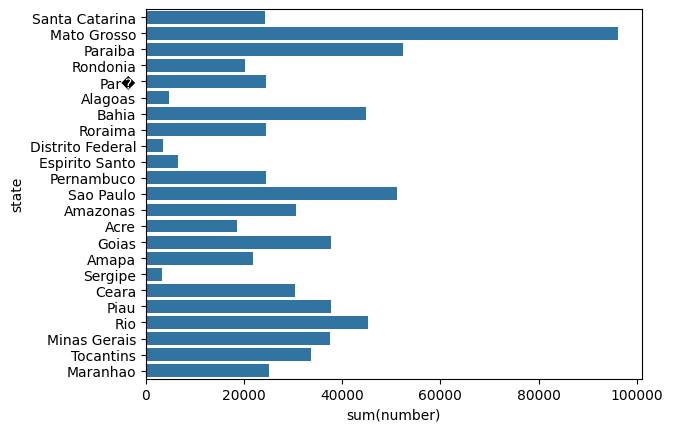

In [17]:
algo = df.groupBy('state').sum('number').toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(algo, x='sum(number)', y='state')

In [18]:
# não faz serntido para a aplicação
from pyspark.sql import functions as F
df = df.withColumn('numbermais1', F.col('number') + 1)
df.show()

+----+-----+-------+------+----------+-----------+
|year|state|  month|number|      date|numbermais1|
+----+-----+-------+------+----------+-----------+
|1998| Acre|Janeiro|   0.0|1998-01-01|        1.0|
|1999| Acre|Janeiro|   0.0|1999-01-01|        1.0|
|2000| Acre|Janeiro|   0.0|2000-01-01|        1.0|
|2001| Acre|Janeiro|   0.0|2001-01-01|        1.0|
|2002| Acre|Janeiro|   0.0|2002-01-01|        1.0|
|2003| Acre|Janeiro|  10.0|2003-01-01|       11.0|
|2004| Acre|Janeiro|   0.0|2004-01-01|        1.0|
|2005| Acre|Janeiro|  12.0|2005-01-01|       13.0|
|2006| Acre|Janeiro|   4.0|2006-01-01|        5.0|
|2007| Acre|Janeiro|   0.0|2007-01-01|        1.0|
|2008| Acre|Janeiro|   0.0|2008-01-01|        1.0|
|2009| Acre|Janeiro|   0.0|2009-01-01|        1.0|
|2010| Acre|Janeiro|   1.0|2010-01-01|        2.0|
|2011| Acre|Janeiro|   0.0|2011-01-01|        1.0|
|2012| Acre|Janeiro|   0.0|2012-01-01|        1.0|
|2013| Acre|Janeiro|   0.0|2013-01-01|        1.0|
|2014| Acre|Janeiro|   0.0|2014

In [19]:
df.createOrReplaceTempView('incendios')

In [20]:
spark.sql('SELECT * FROM incendios WHERE state = "Acre"').show()

+----+-----+-------+------+----------+-----------+
|year|state|  month|number|      date|numbermais1|
+----+-----+-------+------+----------+-----------+
|1998| Acre|Janeiro|   0.0|1998-01-01|        1.0|
|1999| Acre|Janeiro|   0.0|1999-01-01|        1.0|
|2000| Acre|Janeiro|   0.0|2000-01-01|        1.0|
|2001| Acre|Janeiro|   0.0|2001-01-01|        1.0|
|2002| Acre|Janeiro|   0.0|2002-01-01|        1.0|
|2003| Acre|Janeiro|  10.0|2003-01-01|       11.0|
|2004| Acre|Janeiro|   0.0|2004-01-01|        1.0|
|2005| Acre|Janeiro|  12.0|2005-01-01|       13.0|
|2006| Acre|Janeiro|   4.0|2006-01-01|        5.0|
|2007| Acre|Janeiro|   0.0|2007-01-01|        1.0|
|2008| Acre|Janeiro|   0.0|2008-01-01|        1.0|
|2009| Acre|Janeiro|   0.0|2009-01-01|        1.0|
|2010| Acre|Janeiro|   1.0|2010-01-01|        2.0|
|2011| Acre|Janeiro|   0.0|2011-01-01|        1.0|
|2012| Acre|Janeiro|   0.0|2012-01-01|        1.0|
|2013| Acre|Janeiro|   0.0|2013-01-01|        1.0|
|2014| Acre|Janeiro|   0.0|2014

In [21]:
# query
spark.sql("SELECT state, SUM(number) as soma_incendios FROM incendios GROUP BY state").show()

+----------------+------------------+
|           state|    soma_incendios|
+----------------+------------------+
|  Santa Catarina|         24359.852|
|     Mato Grosso| 96246.02799999995|
|         Paraiba| 52435.91800000001|
|        Rondonia|         20285.429|
|            Par�| 24512.14400000002|
|         Alagoas|            4644.0|
|           Bahia| 44746.22599999999|
|         Roraima|         24385.074|
|Distrito Federal|            3561.0|
|  Espirito Santo|            6546.0|
|      Pernambuco|           24498.0|
|       Sao Paulo|51121.198000000004|
|        Amazonas|30650.129000000008|
|            Acre|          18464.03|
|           Goias|37695.520000000004|
|           Amapa|21831.575999999997|
|         Sergipe|            3237.0|
|           Ceara|         30428.063|
|            Piau|37803.746999999996|
|             Rio|         45160.865|
+----------------+------------------+
only showing top 20 rows



In [22]:
# filtragem
spark.sql("SELECT * FROM incendios WHERE number > 0").show()

+----+-----+---------+------+----------+-----------+
|year|state|    month|number|      date|numbermais1|
+----+-----+---------+------+----------+-----------+
|2003| Acre|  Janeiro|  10.0|2003-01-01|       11.0|
|2005| Acre|  Janeiro|  12.0|2005-01-01|       13.0|
|2006| Acre|  Janeiro|   4.0|2006-01-01|        5.0|
|2010| Acre|  Janeiro|   1.0|2010-01-01|        2.0|
|2015| Acre|  Janeiro|   1.0|2015-01-01|        2.0|
|2016| Acre|  Janeiro|  12.0|2016-01-01|       13.0|
|2002| Acre|Fevereiro|   1.0|2002-01-01|        2.0|
|2004| Acre|Fevereiro|   3.0|2004-01-01|        4.0|
|2007| Acre|Fevereiro|   5.0|2007-01-01|        6.0|
|2009| Acre|Fevereiro|   2.0|2009-01-01|        3.0|
|2015| Acre|Fevereiro|   2.0|2015-01-01|        3.0|
|2016| Acre|Fevereiro|   5.0|2016-01-01|        6.0|
|2017| Acre|Fevereiro|   1.0|2017-01-01|        2.0|
|2000| Acre|    Mar�o|  11.0|2000-01-01|       12.0|
|2005| Acre|    Mar�o|   3.0|2005-01-01|        4.0|
|2007| Acre|    Mar�o|   2.0|2007-01-01|      

In [23]:
spark.sql("SELECT state, upper(month) as mes_maiusculo FROM incendios").show()

+-----+-------------+
|state|mes_maiusculo|
+-----+-------------+
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
| Acre|      JANEIRO|
+-----+-------------+
only showing top 20 rows



In [24]:
# ordenacao
spark.sql("SELECT * FROM incendios ORDER BY number DESC").show()

+----+-----------+--------+------+----------+-----------+
|year|      state|   month|number|      date|numbermais1|
+----+-----------+--------+------+----------+-----------+
|2008|   Amazonas|Setembro| 998.0|2008-01-01|      999.0|
|2006|      Bahia|  Agosto| 995.0|2006-01-01|      996.0|
|2012|      Ceara|Novembro| 995.0|2012-01-01|      996.0|
|2009|  Tocantins|   Julho| 989.0|2009-01-01|      990.0|
|2017|    Paraiba|  Agosto| 987.0|2017-01-01|      988.0|
|1999|       Par�|   Julho| 982.0|1999-01-01|      983.0|
|2007|  Tocantins|   Julho| 982.0|2007-01-01|      983.0|
|2017|  Sao Paulo|  Agosto| 981.0|2017-01-01|      982.0|
|2001|      Bahia|  Agosto| 979.0|2001-01-01|      980.0|
|2009|Mato Grosso|   Junho| 979.0|2009-01-01|      980.0|
|2003|  Sao Paulo|Setembro| 977.0|2003-01-01|      978.0|
|2002|  Tocantins|   Julho| 976.0|2002-01-01|      977.0|
|2011|Mato Grosso|   Junho| 974.0|2011-01-01|      975.0|
|2009|   Amazonas|Novembro| 973.0|2009-01-01|      974.0|
|2009|   Maran

In [25]:
df.orderBy('number', ascending=False).show()

+----+-----------+--------+------+----------+-----------+
|year|      state|   month|number|      date|numbermais1|
+----+-----------+--------+------+----------+-----------+
|2008|   Amazonas|Setembro| 998.0|2008-01-01|      999.0|
|2006|      Bahia|  Agosto| 995.0|2006-01-01|      996.0|
|2012|      Ceara|Novembro| 995.0|2012-01-01|      996.0|
|2009|  Tocantins|   Julho| 989.0|2009-01-01|      990.0|
|2017|    Paraiba|  Agosto| 987.0|2017-01-01|      988.0|
|1999|       Par�|   Julho| 982.0|1999-01-01|      983.0|
|2007|  Tocantins|   Julho| 982.0|2007-01-01|      983.0|
|2017|  Sao Paulo|  Agosto| 981.0|2017-01-01|      982.0|
|2001|      Bahia|  Agosto| 979.0|2001-01-01|      980.0|
|2009|Mato Grosso|   Junho| 979.0|2009-01-01|      980.0|
|2003|  Sao Paulo|Setembro| 977.0|2003-01-01|      978.0|
|2002|  Tocantins|   Julho| 976.0|2002-01-01|      977.0|
|2011|Mato Grosso|   Junho| 974.0|2011-01-01|      975.0|
|2009|   Amazonas|Novembro| 973.0|2009-01-01|      974.0|
|2009|   Maran

In [26]:
dados_complementares = [("Amazonas", "AM"), ("Bahia", "BA"), ("Ceara", "CE")]
df_complem = spark.createDataFrame(dados_complementares, ["state", "apelido"])
df_complem.createTempView("estados")

In [27]:
spark.sql("SELECT i.state, i.number, i.date, e.apelido FROM incendios i JOIN estados e ON i.state = e.state").show()

+--------+------+----------+-------+
|   state|number|      date|apelido|
+--------+------+----------+-------+
|Amazonas| 133.0|2016-01-01|     AM|
|Amazonas| 565.0|2015-01-01|     AM|
|Amazonas| 293.0|2014-01-01|     AM|
|Amazonas| 236.0|2013-01-01|     AM|
|Amazonas|  80.0|2012-01-01|     AM|
|Amazonas| 121.0|2011-01-01|     AM|
|Amazonas| 123.0|2010-01-01|     AM|
|Amazonas| 102.0|2009-01-01|     AM|
|Amazonas|   0.0|2008-01-01|     AM|
|Amazonas|   7.0|2007-01-01|     AM|
|Amazonas|  23.0|2006-01-01|     AM|
|Amazonas|  17.0|2005-01-01|     AM|
|Amazonas|  53.0|2004-01-01|     AM|
|Amazonas| 147.0|2003-01-01|     AM|
|Amazonas|  44.0|2002-01-01|     AM|
|Amazonas|  22.0|2001-01-01|     AM|
|Amazonas|  60.0|2000-01-01|     AM|
|Amazonas|   2.0|1999-01-01|     AM|
|Amazonas| 196.0|1998-01-01|     AM|
|Amazonas| 552.0|2017-01-01|     AM|
+--------+------+----------+-------+
only showing top 20 rows



In [28]:
df.join(df_complem, df.state == df_complem.state, 'inner').select(df.state, df.number, df.date, df_complem.apelido).show()

+--------+------+----------+-------+
|   state|number|      date|apelido|
+--------+------+----------+-------+
|Amazonas| 133.0|2016-01-01|     AM|
|Amazonas| 565.0|2015-01-01|     AM|
|Amazonas| 293.0|2014-01-01|     AM|
|Amazonas| 236.0|2013-01-01|     AM|
|Amazonas|  80.0|2012-01-01|     AM|
|Amazonas| 121.0|2011-01-01|     AM|
|Amazonas| 123.0|2010-01-01|     AM|
|Amazonas| 102.0|2009-01-01|     AM|
|Amazonas|   0.0|2008-01-01|     AM|
|Amazonas|   7.0|2007-01-01|     AM|
|Amazonas|  23.0|2006-01-01|     AM|
|Amazonas|  17.0|2005-01-01|     AM|
|Amazonas|  53.0|2004-01-01|     AM|
|Amazonas| 147.0|2003-01-01|     AM|
|Amazonas|  44.0|2002-01-01|     AM|
|Amazonas|  22.0|2001-01-01|     AM|
|Amazonas|  60.0|2000-01-01|     AM|
|Amazonas|   2.0|1999-01-01|     AM|
|Amazonas| 196.0|1998-01-01|     AM|
|Amazonas| 552.0|2017-01-01|     AM|
+--------+------+----------+-------+
only showing top 20 rows



24/05/22 16:01:55 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


## Perguntas

1. Dentre as pessoas que tem doenças mentais, quantas buscaram tratamento?
2. Quais grupos de idade estão mais conscientes sobre sua saúde mental?
3. Qual a associação entre gênero e tratamento?
4. Como o histórico familiar é relaciona a presença de doenças mentais e tratamento?
5. Qual é o nível de interferiencia no trabalho que essas doenças causam?
6. Os funcionário acreditamque discutir a saúde mental ou a saúde física com seus chefes pode trazer consequências negativas?

## Voltamos 20:15

In [6]:
import pandas as pd

In [7]:
df_pandas = pd.read_csv('survey.csv')

In [8]:
df_spark = spark.read.csv('survey.csv', header=True, inferSchema=True)

In [9]:
df_pandas.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [10]:
spark.createDataFrame(df_spark.take(5)).toPandas()
#df_spark.show(5)

24/06/19 12:59:50 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NA,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NA
1,2014-08-27 11:29:37,44,M,United States,IN,NA,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NA
2,2014-08-27 11:29:44,32,Male,Canada,NA,NA,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NA
3,2014-08-27 11:29:46,31,Male,United Kingdom,NA,NA,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NA
4,2014-08-27 11:30:22,31,Male,United States,TX,NA,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NA


In [11]:
df_pandas.columns
#df_spark.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [12]:
colunas_irrelevantes = ['Timestamp', 'Country', 'self_employed', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'coworkers', 'obs_consequence', 'comments']

In [13]:
df_pandas.drop(colunas_irrelevantes, axis=1, inplace=True)

In [14]:
df_spark = df_spark.drop(*colunas_irrelevantes)

In [15]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   state                      744 non-null    object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   care_options               1259 non-null   object
 7   mental_health_consequence  1259 non-null   object
 8   phys_health_consequence    1259 non-null   object
 9   supervisor                 1259 non-null   object
 10  mental_health_interview    1259 non-null   object
 11  phys_health_interview      1259 non-null   object
 12  mental_vs_physical         1259 non-null   object
dtypes: int64(1), object(12)
memory usage: 128.0+ KB


In [16]:
print(df_pandas.shape)
print(df_pandas.isnull().sum())


(1259, 13)
Age                            0
Gender                         0
state                        515
family_history                 0
treatment                      0
work_interfere               264
care_options                   0
mental_health_consequence      0
phys_health_consequence        0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
dtype: int64


In [17]:
df_spark.printSchema()

root
 |-- Age: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- state: string (nullable = true)
 |-- family_history: string (nullable = true)
 |-- treatment: string (nullable = true)
 |-- work_interfere: string (nullable = true)
 |-- care_options: string (nullable = true)
 |-- mental_health_consequence: string (nullable = true)
 |-- phys_health_consequence: string (nullable = true)
 |-- supervisor: string (nullable = true)
 |-- mental_health_interview: string (nullable = true)
 |-- phys_health_interview: string (nullable = true)
 |-- mental_vs_physical: string (nullable = true)



In [18]:
print('linhas: ', df_spark.count())
print('colunas: ', len(df_spark.columns))

linhas:  1259
colunas:  13


In [20]:
from pyspark.sql import functions as F
df_spark = df_spark.replace(['NA'], None)

nulos = df_spark.select(*[F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df_spark.columns])

#processo para ordenação das colunas nulas
nulos_lista = [(col, nulos.first()[col]) for col in nulos.columns]
sorted(nulos_lista, key = lambda x: x[1], reverse=True)

[('state', 515),
 ('work_interfere', 264),
 ('Age', 0),
 ('Gender', 0),
 ('family_history', 0),
 ('treatment', 0),
 ('care_options', 0),
 ('mental_health_consequence', 0),
 ('phys_health_consequence', 0),
 ('supervisor', 0),
 ('mental_health_interview', 0),
 ('phys_health_interview', 0),
 ('mental_vs_physical', 0)]

In [21]:
df_spark = df_spark.drop('state')
df_pandas.drop('state', axis=1, inplace=True)

In [22]:
df_pandas['work_interfere'] = df_pandas['work_interfere'].fillna(df_pandas['work_interfere'].mode([0]))

In [23]:
moda_df = df_spark.select(F.mode(F.col('work_interfere')).alias('moda'))
moda = moda_df.collect()[0]['moda']

df_spark = df_spark.fillna({'work_interfere': moda})

In [24]:
df_pandas.describe(include='all')

,Age,Gender,family_history,treatment,work_interfere,care_options,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
count,1.259000e+03,1259,1259,1259,995,1259,1259,1259,1259,1259,1259,1259
unique,NaN,49,2,2,4,3,3,3,3,3,3,3
top,NaN,Male,No,Yes,Sometimes,No,No,No,Yes,No,Maybe,Don't know
freq,NaN,615,767,637,465,501,490,925,516,1008,557,576
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_spark.summary().toPandas()

,summary,Age,Gender,family_history,treatment,work_interfere,care_options,mental_health_consequence,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
0,count,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
1,mean,7.942814831135821E7,None,None,None,None,None,None,None,None,None,None,None
2,stddev,2.8182994429819684E9,None,None,None,None,None,None,None,None,None,None,None
3,min,-1726,A little about you,No,No,Never,No,Maybe,Maybe,No,Maybe,Maybe,Don't know
4,25%,27,None,None,None,None,None,None,None,None,None,None,None
5,50%,31,None,None,None,None,None,None,None,None,None,None,None
6,75%,36,None,None,None,None,None,None,None,None,None,None,None
7,max,99999999999,woman,Yes,Yes,Sometimes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [26]:
def ver_moda(coluna):
    moda_df = df_spark.select(F.mode(F.col(coluna)).alias('moda'))
    moda = moda_df.collect()[0]['moda']
    return moda

ver_moda('family_history')

'No'

In [27]:
coluna = 'Gender'
df_spark.select(coluna).distinct().show()

+------------+
|      Gender|
+------------+
|  non-binary|
|        Make|
|           F|
| Genderqueer|
|         Man|
|  Male (CIS)|
|           m|
|     Female |
|     Agender|
|         Mal|
|           f|
|       maile|
|Trans-female|
|         Nah|
|  Cis Female|
|       woman|
|      Female|
|     Cis Man|
|      female|
|           M|
+------------+
only showing top 20 rows



In [28]:
df_pandas['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [29]:
df_spark = df_spark.filter(F.col("Age") >= 18)
df_spark = df_spark.filter(F.col("Age") < 100)

In [30]:
m = ['m', 'male', 'maile', 'cis male', 'mal', 'male (cis)', 'make', 'male ', 'man', 'msle', 'mail', 'malr', 'cis man']
f = ['female', 'trans-female', 'cis female', 'f', 'woman', 'femake', 'female ', 'cis-female/femme','trans woman', 'female (trans)', 'female (cis)', 'femail']

def categorizar(genero):
    genero = genero.lower() if genero else ''
    if genero in m:
        return 'm'
    elif genero in f:
        return 'f'
    else:
        return 'outros'

udf = F.udf(categorizar)
df_spark = df_spark.withColumn("Gender", udf(F.col('Gender')))


In [31]:
df_pandas = df_pandas[df_pandas['Age']>=18]
df_pandas = df_pandas[df_pandas['Age']<110]

In [32]:
for (row, col) in df_pandas.iterrows():
    if str.lower(col['Gender']) in m:
       df_pandas['Gender'] = df_pandas['Gender'].replace(to_replace=col['Gender'], value='m')
    elif str.lower(col['Gender']) in f:
        df_pandas['Gender'] = df_pandas['Gender'].replace(to_replace=col['Gender'], value='f')
    else:
        df_pandas['Gender'] = df_pandas['Gender'].replace(to_replace=col['Gender'], value='other')

In [33]:
# 1. Dentre as pessoas que tem doenças mentais, quantas buscaram tratamento?
tratamento = (df_spark.groupBy('treatment').agg(F.count('treatment').alias('Count'), F.round((F.count('treatment') / df_spark.count())*100, 2).alias('Porc')))
import seaborn as sns

tratamento.show()
#sns.barplot(x='treatment', y='Porc', data=tratamento.toPandas())

+---------+-----+-----+
|treatment|Count| Porc|
+---------+-----+-----+
|       No|  619|49.48|
|      Yes|  632|50.52|
+---------+-----+-----+



In [34]:
df_pandas.groupby('treatment')['Age'].count()
#sns.countplot(df_pandas, x='treatment')

treatment
No     619
Yes    632
Name: Age, dtype: int64

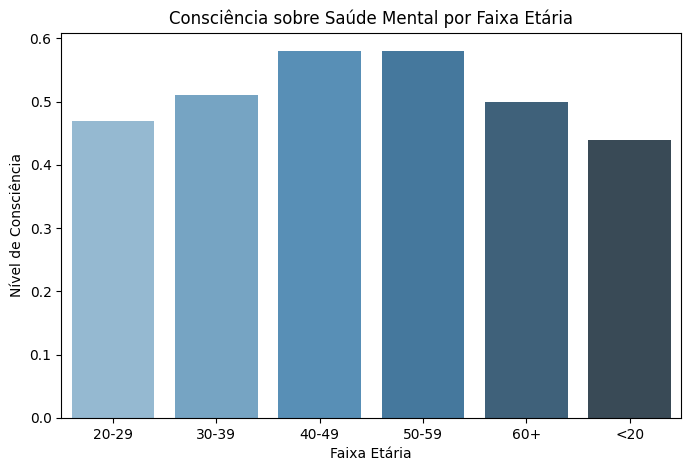

In [53]:
# 2. Quais grupos de idade estão mais conscientes sobre sua saúde mental?
# Definindo a consciência como aqueles que responderam 'Yes' em treatment
consciousness_age_group = (
    df_spark.withColumn('Age_Group', F.when((F.col('Age') < 20), '<20')
        .when((F.col('Age') >= 20) & (F.col('Age') < 30), '20-29')
        .when((F.col('Age') >= 30) & (F.col('Age') < 40), '30-39')
        .when((F.col('Age') >= 40) & (F.col('Age') < 50), '40-49')
        .when((F.col('Age') >= 50) & (F.col('Age') < 60), '50-59')
        .otherwise('60+'))
    .groupBy('Age_Group')
    .agg(F.round(F.mean(F.when(F.col('treatment') == 'Yes', 1).otherwise(0)), 2).alias('Awareness_Level'))
    .orderBy('Age_Group')
)

consciousness_age_group_pd = consciousness_age_group.toPandas()

# 1. Histograma para a consciência de saúde mental por faixa etária
plt.figure(figsize=(8, 5))
sns.barplot(x='Age_Group', y='Awareness_Level', hue='Age_Group', data=consciousness_age_group_pd, palette='Blues_d')
plt.title('Consciência sobre Saúde Mental por Faixa Etária')
plt.ylabel('Nível de Consciência')
plt.xlabel('Faixa Etária')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

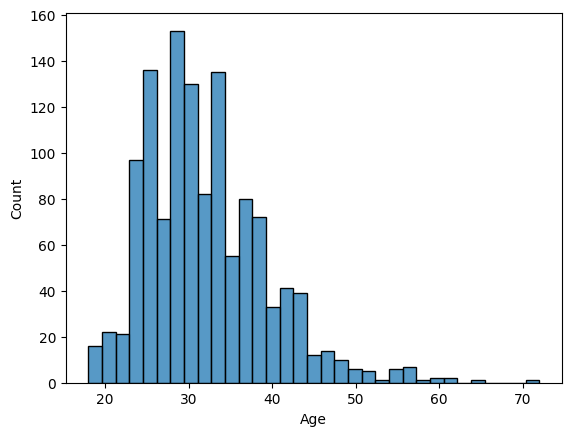

In [38]:
sns.histplot(data=df_pandas, x='Age')

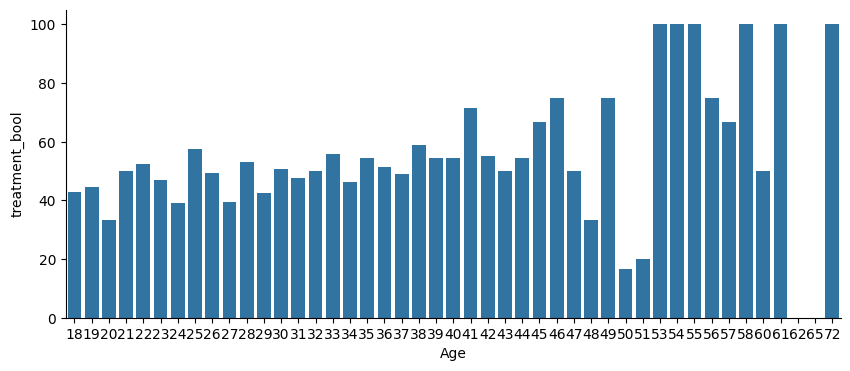

In [47]:
import matplotlib.pyplot as plt
filt = df_pandas[['Age', 'treatment']]
filt.loc[:,['treatment_bool']] = filt['treatment'].map({'Yes':True, 'No':False})

perc = filt.groupby('Age')['treatment_bool'].mean() * 100

perc = perc.reset_index()

plt.figure(figsize=(10,4))

sns.barplot(x=perc['Age'], y=perc['treatment_bool'])

sns.despine()

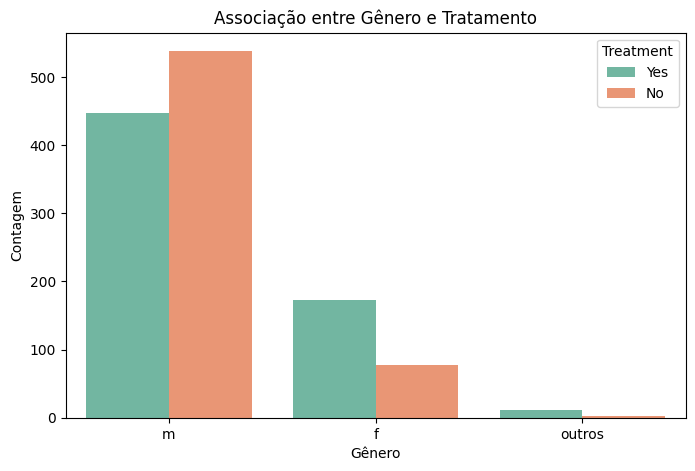

In [55]:
# 3. Qual a associação entre gênero e tratamento?
gender_treatment = (
    df_spark.groupBy('Gender')
    .agg(
        F.count(F.when(F.col('treatment') == 'Yes', 1)).alias('Yes'),
        F.count(F.when(F.col('treatment') == 'No', 1)).alias('No')
    )
)

gender_treatment_pd = gender_treatment.toPandas()

# Gráfico de barras para a associação entre gênero e tratamento
gender_treatment_pd_melted = gender_treatment_pd.melt(id_vars=['Gender'], value_vars=['Yes', 'No'], var_name='Treatment', value_name='Count')
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Count', hue='Treatment', data=gender_treatment_pd_melted, palette='Set2')
plt.title('Associação entre Gênero e Tratamento')
plt.ylabel('Contagem')
plt.xlabel('Gênero')
plt.show()

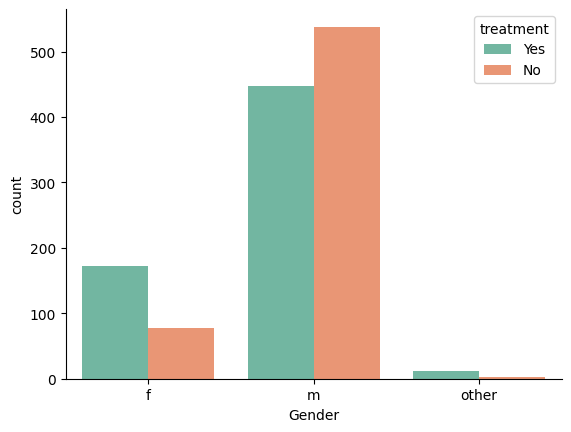

In [57]:
sns.countplot(data=df_pandas, x='Gender', hue='treatment', palette='Set2')
sns.despine()

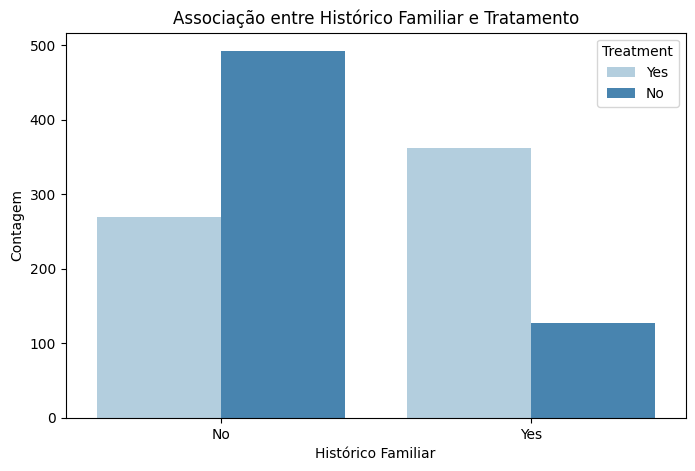

In [60]:
# 4. Como o histórico familiar é relaciona a presença de doenças mentais e tratamento?
family_history_treatment = (
    df_spark.groupBy('family_history')
    .agg(
        F.count(F.when(F.col('treatment') == 'Yes', 1)).alias('Yes'),
        F.count(F.when(F.col('treatment') == 'No', 1)).alias('No')
    )
)

family_history_treatment_pd = family_history_treatment.toPandas()

# Gráfico de barras para histórico familiar e tratamento
family_history_treatment_pd_melted = family_history_treatment_pd.melt(id_vars=['family_history'], value_vars=['Yes', 'No'], var_name='Treatment', value_name='Count')
plt.figure(figsize=(8, 5))
sns.barplot(x='family_history', y='Count', hue='Treatment', data=family_history_treatment_pd_melted, palette='Blues')
plt.title('Associação entre Histórico Familiar e Tratamento')
plt.ylabel('Contagem')
plt.xlabel('Histórico Familiar')
plt.show()

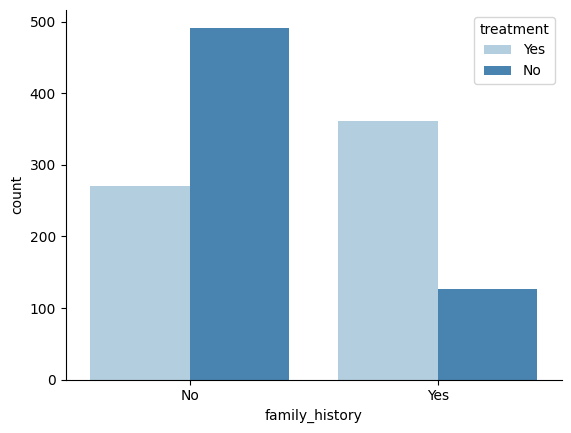

In [62]:
sns.countplot(data=df_pandas, x='family_history', hue='treatment', palette='Blues')
sns.despine()

/var/folders/ts/25xsg3cx09zgv15ygxc6krc00000gn/T/ipykernel_46987/372179633.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pandas, x='family_history', palette='Blues')


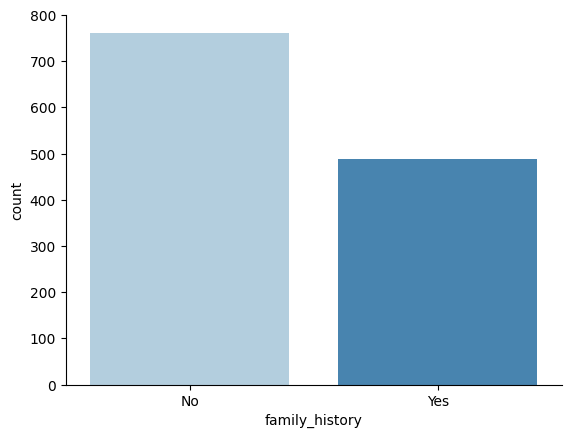

In [68]:
sns.countplot(data=df_pandas, x='family_history', palette='Blues')
sns.despine()

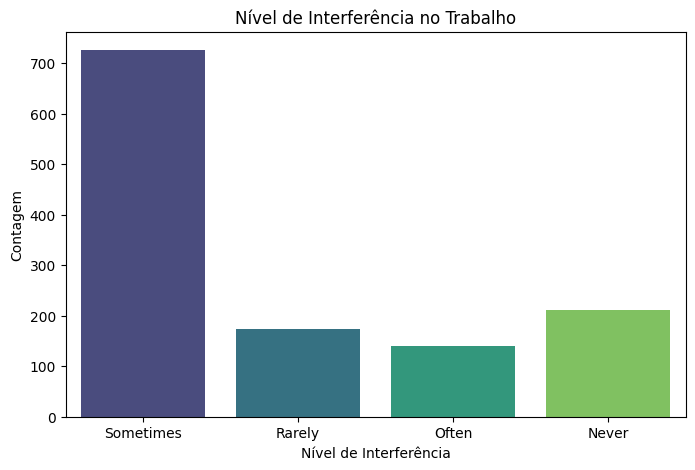

In [66]:
# 5. Qual é o nível de interferiencia no trabalho que essas doenças causam?
work_interfere_levels = (
    df_spark.groupBy('work_interfere')
    .agg(
        F.count('work_interfere').alias('Count'),
        F.round((F.count('work_interfere') / df_spark.count()), 2).alias('Proportion')
    )
)

work_interfere_levels_pd = work_interfere_levels.toPandas()

# Gráfico para analisar o nível de interferência no trabalho
plt.figure(figsize=(8, 5))
sns.barplot(x='work_interfere', y='Count', hue='work_interfere', data=work_interfere_levels_pd, palette='viridis')
plt.title('Nível de Interferência no Trabalho')
plt.ylabel('Contagem')
plt.xlabel('Nível de Interferência')
plt.show()

Text(0.5, 1.0, 'Os problemas de saúde mental interferem no trabalho?')

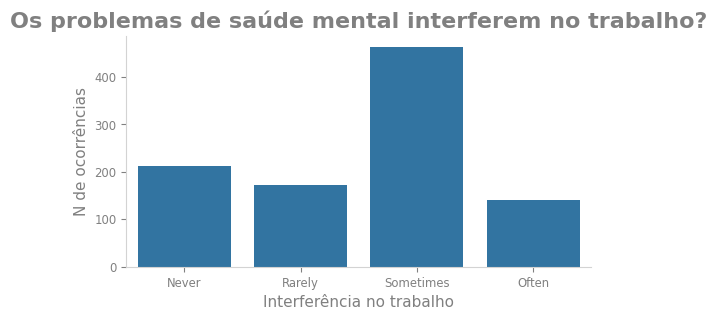

In [70]:
# gráfico bonitinho e clean
plt.figure(figsize=(6,3))
sns.countplot(data=df_pandas, x='work_interfere', width=0.8, order=['Never', 'Rarely', 'Sometimes', 'Often'])

sns.despine()
plt.gca().spines['left'].set_color('lightgray')
plt.gca().spines['bottom'].set_color('lightgray')

plt.tick_params(axis='both', labelsize='small', labelcolor='gray', color='gray')

plt.xlabel('Interferência no trabalho', fontsize=11, color='gray')
plt.ylabel('N de ocorrências', fontsize=11, color='gray')

plt.title('Os problemas de saúde mental interferem no trabalho?', fontdict={'fontsize':16, 'color': 'gray', 'fontweight':'bold'})

<Figure size 800x500 with 0 Axes>

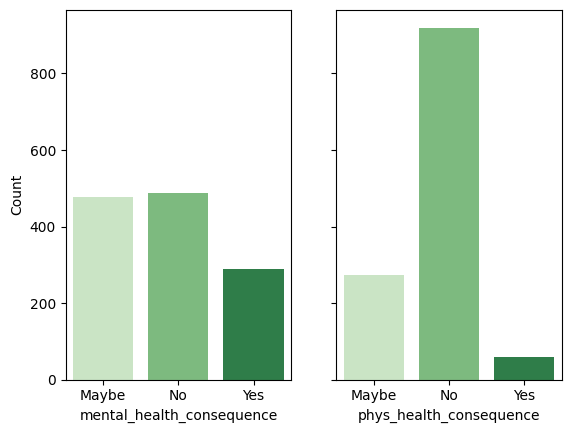

In [87]:
# 6. Os funcionário acreditamque discutir a saúde mental ou a saúde física com seus chefes pode trazer consequências negativas?
mental_health_consequence = (
    df_spark.groupBy('mental_health_consequence')
    .agg(
        F.count('mental_health_consequence').alias('Count')
    )
)

phys_health_consequence = (
    df_spark.groupBy('phys_health_consequence')
    .agg(
        F.count('phys_health_consequence').alias('Count')
    )
)

mental_health_consequence_pd = mental_health_consequence.toPandas()
phys_health_consequence_pd = phys_health_consequence.toPandas()

# Gráficos para discutir as consequências negativas
# Mental health

plt.figure(figsize=(8,5))
fig, axs = plt.subplots(1, 2, sharey=True)
sns.barplot(x='mental_health_consequence', y='Count', hue='mental_health_consequence', data=mental_health_consequence_pd, palette='Greens', ax=axs[0])
plt.subplot(1,2,2)

# Physical health
sns.barplot(x='phys_health_consequence', y='Count', hue='phys_health_consequence', data=phys_health_consequence_pd, palette='Greens', ax=axs[1])
plt.show()

<Axes: xlabel='phys_health_consequence', ylabel='count'>

<Figure size 800x500 with 0 Axes>

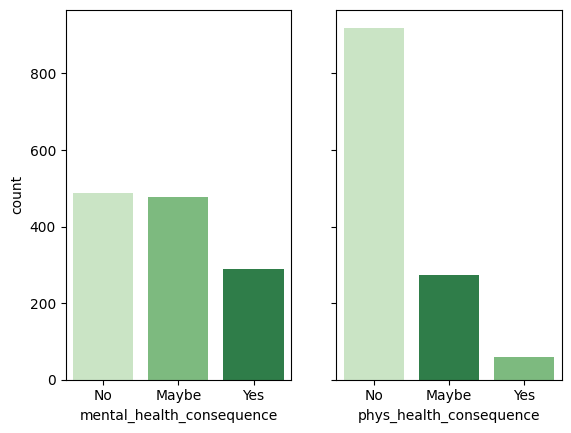

In [78]:
plt.figure(figsize=(8,5))
fig, axs = plt.subplots(1, 2, sharey=True)
sns.countplot(x='mental_health_consequence', hue='mental_health_consequence', data=df_pandas, palette='Greens', ax=axs[0])

plt.subplot(1,2,2)

sns.countplot(x='phys_health_consequence', hue='phys_health_consequence', data=df_pandas, palette='Greens', order=['No', 'Maybe', 'Yes'], ax=axs[1])